In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import itertools
import re
import seaborn as sns 
from scipy.integrate import odeint

In [44]:
input_dir = 'simulation_data/2m_disc_anti/data'

In [45]:
allfiles = os.listdir(input_dir)
files = sorted(allfiles)

In [46]:
param_values_c = np.around(np.arange(0,1.001,0.01), 2)
param_values_y = np.around(np.arange(0,1.001,0.01), 2)
# lattice of y and gamma values
params_lattice = list(itertools.product(param_values_y, param_values_c))

In [47]:
data = []
for f in files:
    coordinate = params_lattice[files.index(f)]
    df = pd.read_pickle(f'{input_dir}/{f}')

    # average the outcome over all the runs
    x_coord = coordinate[1]
    y_coord = coordinate[0]
    z_value = np.mean([df[df.shape[1]-1][i][1] for i in range(df.shape[0])])
    data.append([x_coord, y_coord, z_value])

#df_save = pd.DataFrame(data, columns=["x", "y", "z"])
#df_save.to_csv("2m_b1_r1.5.csv", index=False)

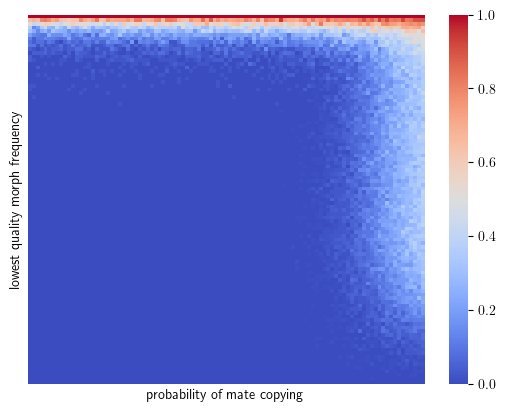

In [48]:
fix_fractions = np.zeros((len(param_values_y), len(param_values_c)))
for f in files:
    coordinate = params_lattice[files.index(f)]
    df = pd.read_pickle(f'{input_dir}/{f}')

    # average the outcome over all the runs
    x_idx = np.where(param_values_c==coordinate[1])[0][0]
    y_idx = np.where(param_values_y==coordinate[0])[0][0]
    last_gen = np.mean([df[df.shape[1]-1][i][1] for i in range(df.shape[0])])
    fix_fractions[y_idx][x_idx] = last_gen

sns.heatmap(fix_fractions,xticklabels=[],yticklabels=[], cmap='coolwarm')
plt.gca().invert_yaxis() 
plt.xlabel("probability of mate copying")
plt.ylabel('lowest quality morph frequency')
plt.show()

/var/folders/mz/q0gq9trj4nx1jdkz52x8x2tr0000gr/T/ipykernel_43037/2343978916.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  A = (u/(1-u) + 1-c)/(a*c)
/var/folders/mz/q0gq9trj4nx1jdkz52x8x2tr0000gr/T/ipykernel_43037/2343978916.py:19: RuntimeWarning: invalid value encountered in scalar power
  y =  1/(k**(1/b)+1) # internal fixed point


Bifurcation point:  0.393939393939394


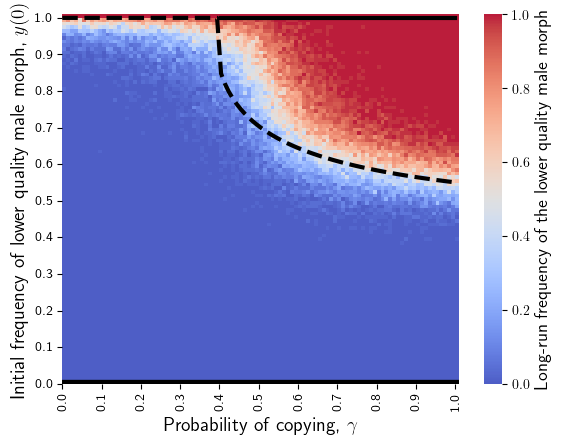

In [32]:
u = 0 # fraction of matings in the training period
q1 = 2 # lower quality morph
q2 = 3 # higher quality morph
a = 0.8 # factor of asymmetry
b = 2 # extent of conformism
r = q2/q1
#r=4.2

# range of gamma values for plotting model output
c_range = np.linspace(0,1,100)

polymorph = []
bif_pt = 0
is_bif_pt = False

for c in c_range:
    A = (u/(1-u) + 1-c)/(a*c)
    k = (r+1)/(A*(r-1)+r) - 1
    y =  1/(k**(1/b)+1) # internal fixed point

    # characterising bifurcation point
    if 1-y>0.0001:
        if is_bif_pt==False:
            print('Bifurcation point: ', c)
            bif_pt = c
            is_bif_pt = True
        
    polymorph.append(y)

after_bif = [x for x in c_range if x>bif_pt]
before_bif = [x for x in c_range if x<=bif_pt]

for i in range(len(before_bif)):
    polymorph[i] = 1

# Create a heatmap
#threshold = np.where(fix_fractions > 0.2, 1, 0)
fig, ax = plt.subplots()
plt.rcParams['text.usetex'] = True
hm = sns.heatmap(fix_fractions, cmap='coolwarm', alpha=0.9,cbar=True, ax=ax, cbar_kws={'label': 'Long-run frequency of the lower quality male morph'})

cbar = hm.collections[0].colorbar
cbar.set_label('Long-run frequency of the lower quality male morph', fontsize=13)

# Select tick positions for labeling (e.g., 0.1, 0.2, ..., 1.0)
tick_positions_x = np.arange(0, len(param_values_c), 10)  # Every 10th index
tick_positions_y = np.arange(0, len(param_values_y), 10)  # Every 10th index
tick_labels_x = [f"{param_values_c[i]:.1f}" for i in tick_positions_x]  # X tick labels
tick_labels_y = [f"{param_values_y[i]:.1f}" for i in tick_positions_y]  # Y tick labels

# Set ticks and labels
ax.set_xticks(tick_positions_x)
ax.set_xticklabels(tick_labels_x)
ax.set_yticks(tick_positions_y)
ax.set_yticklabels(tick_labels_y)
ax.invert_yaxis()  # Flip y-axis for correct orientation

# Plot curve with rescaled coordinates
curve_x = np.interp(c_range, param_values_c, np.arange(len(param_values_c)))
curve_y = np.interp(polymorph, param_values_y, np.arange(len(param_values_y)))
ax.plot(curve_x, curve_y, 'k--', linewidth=3)
ax.plot(curve_x, np.repeat(0,100), 'k-', linewidth=6)
ax.plot(np.array(after_bif)*100, np.repeat(100, len(after_bif)), 'k-', linewidth=3)

# Labels and aspect
ax.set_xlabel(r'Probability of copying, $\gamma$', fontsize=14)
ax.set_ylabel(r'Initial frequency of lower quality male morph, $y(0)$', fontsize=14)
ax.set_aspect('auto')  # Adjust aspect ratio
#plt.savefig("2m_b1_21.5.pdf", format='pdf')
plt.show()


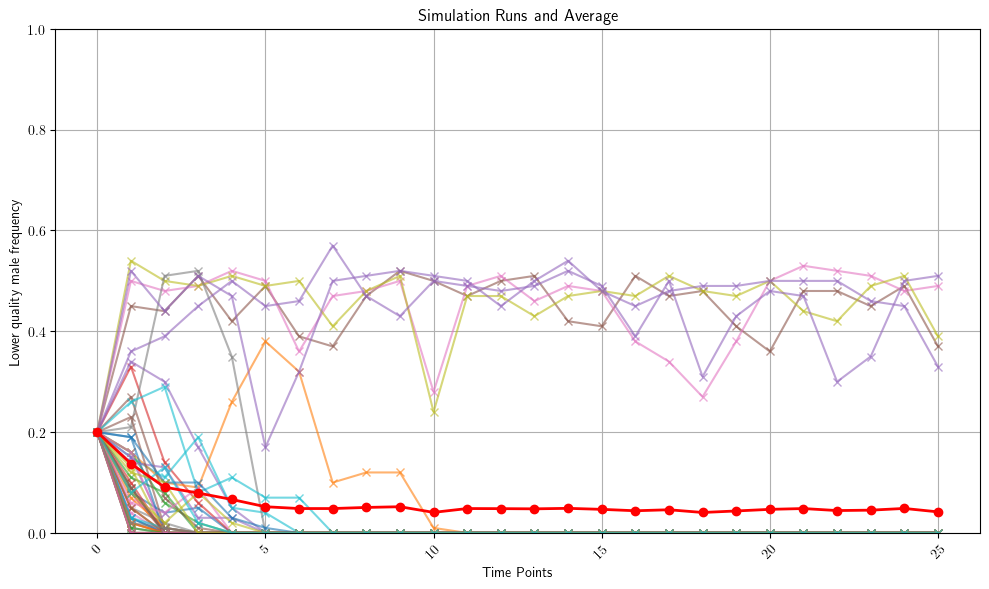

In [53]:
f='0.20_0.90.pkl'
c = 0.9
y0 = 0.2
df = pd.read_pickle(f'{input_dir}/{f}')
time_points = df.columns  # or create a list of time points if needed
runs = []

for i in range(len(df)):
    run_values = [df.iloc[i, j][1] for j in range(len(df.columns))]  # Extract the second element
    runs.append(run_values)

# Plotting individual runs
plt.figure(figsize=(10, 6))
for run in runs:
    plt.plot(time_points, run, marker='x', linestyle='-', alpha=0.6)

# Calculate and plot the average across all runs
average_values = np.mean(runs, axis=0)
plt.plot(time_points, average_values, marker='o', linestyle='-', color='red', label='Average', linewidth=2)

# Plot customization
plt.xlabel('Time Points')
plt.ylabel('Lower quality male frequency')
plt.title('Simulation Runs and Average')
plt.ylim([0,1])
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
def P(y,q):
    return (1-c)*q/(q1+q2) + a*c*(y**b)/(y**b + (1-y)**b)

def dynamics(y,t):
    dydt = y*(1-y)*(u*((q1**2 - q2**2)/(q1+q2)) + (1-u)*(P(y,q1)*q1 - P(1-y,q2)*q2))
    return dydt


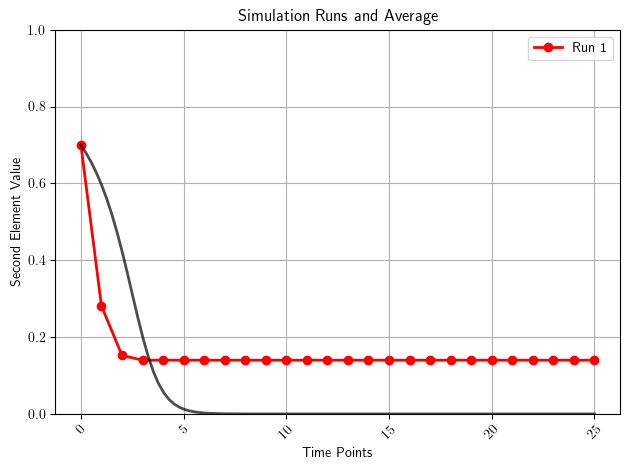

In [11]:
u = 0.1 # fraction of matings in the training period
q1 = 2 # lower quality morph
q2 = 3 # higher quality morph
a = 0.8 # factor of asymmetry
b = 1 # extent of conformism
r = q2/q1
T = 25

t = np.linspace(0,T,100)
sol = odeint(dynamics, y0, t)


fig, ax = plt.subplots()
plt.plot(time_points, average_values, marker='o', linestyle='-', color='red', label='Average', linewidth=2)

# Plot customization
plt.xlabel('Time Points')
plt.ylabel('Second Element Value')
plt.title('Simulation Runs and Average')
plt.ylim([0,1])
plt.legend(['Run ' + str(i+1) for i in range(len(runs))] + ['Average'])
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


ax.plot(t, sol[:,0], 'k', alpha=0.7, linewidth=2)


plt.show()
